<a href="https://colab.research.google.com/github/adrianova8/Data_Probabilities_and_Statistics/blob/main/S07_T01_Dades%2C_probabilitats_i_estad%C3%ADstiques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KAGGLE LINK:**   

https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **DATA SCIENCE ITINERARY - IT ACADEMY**

<div class="alert alert-block alert-info"><font size="6"><center><b><u>Sprint 7. Data Probabilities and Statistics</u></b><center></font>

\begin{align*}Adrià\:Nova\end{align*}
    
\begin{align*}Data\hspace{2mm}Science\hspace{2mm}Integrator\end{align*}
       
\begin{align*}Date : December\hspace{2mm}2021\end{align*}</div>


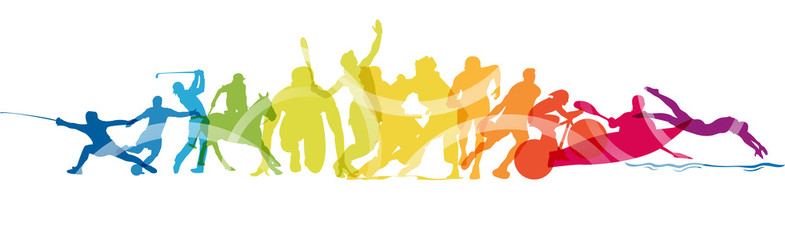

In [102]:
#@title Texto de título predeterminado
from IPython.display import Image
Image('/content/drive/MyDrive/IT Academy - Data Science/Sprint 7. Dades, Probabilitats i Estadístiques/Sprint 7. Dades, Probabilitats i Estadístiques/olympic_games.png')


<div class="alert alert-block alert-info"><font size="6"><b>S07 T01: Data probabilities and statistics</b></font>



<div class="alert alert-block alert-info"><font size="5"><b>Olympic Athletes Data Set</b></font>



## **DATA CONTEXT**

* This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. The data is from **www.sports-reference.com** in May 2018. 

* Note that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on.


## **DATA CONTENT**

* Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). This file contains **271116 rows** and **15 columns**.

## **Variables Description**

**ID:** Unique number for each athlete

**Name:** Athlete's name

**Sex:** Male or Female

**Age:** Athlete's age

**Height:** athlete's height in centimeters

**Weight:** athlete's height in kilograms

**Team:** Team Name (country)

**NOC:** National Olympic Committee (code)

**Games:** Year and season

**Year:** Olympics year

**Season:** Summer or Winter

**City:** Host city

**Sport:** Sport

**Event:** Event

**Medal:** Gold, Silver, Bronze, or NA


## **DATASET TREATMENT**

In [103]:
# Libraries

!pip install plotly==5.4.0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   

In [104]:
# DataSet

olympic_athlets_df = pd.read_csv('/content/drive/MyDrive/IT Academy - Data Science/Sprint 7. Dades, Probabilitats i Estadístiques/120_years_Olympics_history.csv')
olympic_athlets_df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [105]:
# Shape. 271.116 rows 15 columns

olympic_athlets_df.shape

(271116, 15)

In [106]:
# Check the number of elements in DataSet

olympic_athlets_df.size

4066740

In [107]:
# Variables' information

olympic_athlets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


+ We can see how the variables have all the information except for the Medal variable and the float 64 variables.

### **MISSINGS**

In [108]:
# Show the % of missings in this variables

missings = round(olympic_athlets_df.isna().sum()/len(olympic_athlets_df)*100,2)
missings

ID         0.00
Name       0.00
Sex        0.00
Age        3.49
Height    22.19
Weight    23.19
Team       0.00
NOC        0.00
Games      0.00
Year       0.00
Season     0.00
City       0.00
Sport      0.00
Event      0.00
Medal     85.33
dtype: float64

In [109]:
# The NaNs in Medal variable is all those athletes that didn't achieve an olympic medal. For that reason, we are going to replace NaN by No-Medal

olympic_athlets_df.Medal.fillna('No Medal', inplace=True)

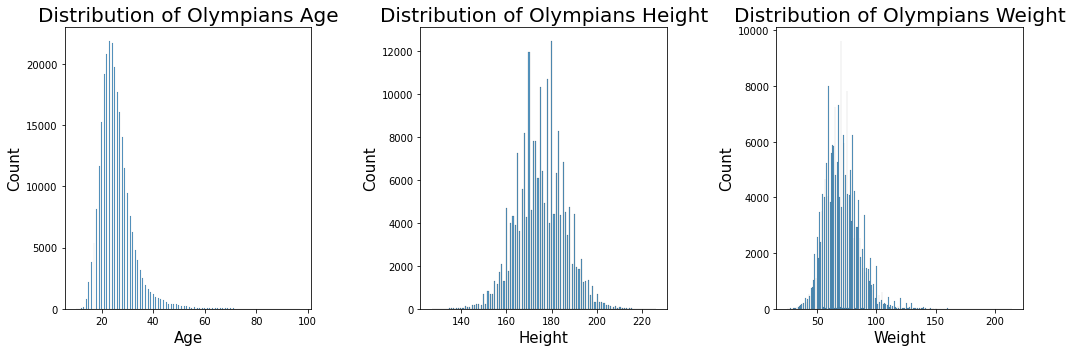

In [110]:
# Let see the distribution of the variable Age, Height, Weight. Normal Distributios

# Create the figures' structure
fig = plt.figure(figsize=(15,5))

# First plot
ax1 = fig.add_subplot(1,3,1)

ax1 = sns.histplot(x = 'Age', data = olympic_athlets_df)
plt.title(label = 'Distribution of Olympians Age', fontsize = 20)
plt.xlabel(xlabel='Age', fontsize= 15)
plt.ylabel(ylabel='Count', fontsize= 15)

# Second plot
ax2 = fig.add_subplot(1,3,2)

ax2 = sns.histplot(x = 'Height', data = olympic_athlets_df)
plt.title(label = 'Distribution of Olympians Height', fontsize = 20)
plt.xlabel(xlabel='Height', fontsize= 15)
plt.ylabel(ylabel='Count', fontsize= 15)

# Third plot
ax3 = fig.add_subplot(1,3,3)

ax3 = sns.histplot(x = 'Weight', data = olympic_athlets_df)
plt.title(label = 'Distribution of Olympians Weight', fontsize = 20)
plt.xlabel(xlabel='Weight', fontsize= 15)
plt.ylabel(ylabel='Count', fontsize= 15)

plt.tight_layout()
plt.show()

In [111]:
print('The mean {} and median {} of the Age variable\n'.format(round(olympic_athlets_df.Age.mean(),2), olympic_athlets_df.Age.median()))
print('The mean {} and median {} of the Height variable\n'.format(round(olympic_athlets_df.Height.mean(),2), olympic_athlets_df.Height.median()))
print('The mean {} and median {} of the Weight variable\n'.format(round(olympic_athlets_df.Weight.mean(),2), olympic_athlets_df.Weight.median()))

The mean 25.56 and median 24.0 of the Age variable

The mean 175.34 and median 175.0 of the Height variable

The mean 70.7 and median 70.0 of the Weight variable



+ We can see that the mean and the median are very close to each other and that they present a **Normal Distribution**. For that reason, I am going to make missings imputation of these three variables with the mean.

In [112]:
# We want to see why are some people with age>65

strange_participants = []

for index, row in olympic_athlets_df.iterrows():
  if row['Age'] > 65:
    strange_participants.append(row)

strange_participants = pd.DataFrame(strange_participants)
strange_participants.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2392,1337,Olof Ahlberg,M,71.0,NaN,NaN,Sweden,SWE,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal
7433,4160,Robert Day Andrews,M,75.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Architecture, Unknown E...",No Medal
9369,5146,George Denholm Armour,M,68.0,NaN,NaN,Great Britain,GBR,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal
9370,5146,George Denholm Armour,M,68.0,NaN,NaN,Great Britain,GBR,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal
9371,5146,George Denholm Armour,M,84.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal


+ We can see that the median is a little different from the mean in the Age variable and is due to the fact that there are some unusual values.These values are mainly due to the fact that there were elderly participants in the discipline of Art, the oldest being 97 years old. In addition, many of them are the ones that do not have information on the variables weight and height.

In [113]:
# Missing imputation with the Mean

olympic_athlets_df.Age = olympic_athlets_df.Age.fillna(olympic_athlets_df.Age.mean())
olympic_athlets_df.Height = olympic_athlets_df.Height.fillna(olympic_athlets_df.Height.mean())
olympic_athlets_df.Weight = olympic_athlets_df.Weight.fillna(olympic_athlets_df.Weight.mean())

In [114]:
# We can drop Games' variable because is a summary of Year and Season

olympic_athlets_df = olympic_athlets_df.drop(columns=['ID','Games'], axis = 0)
olympic_athlets_df.head(5)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
2,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal
3,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal


### **DUPLICATES**

In [115]:
# Check if there are duplicates. There are 1.385 duplicated rows

olympic_athlets_df.duplicated().value_counts()

False    269731
True       1385
dtype: int64

In [116]:
# See the first 10 duplicated rows

duplicates = olympic_athlets_df.loc[olympic_athlets_df.duplicated()]
duplicates.head(10)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
1252,Dsir Antoine Acket,M,27.0,175.33897,70.702393,Belgium,BEL,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal
4282,William Truman Aldrich,M,48.0,175.33897,70.702393,United States,USA,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",No Medal
4283,William Truman Aldrich,M,48.0,175.33897,70.702393,United States,USA,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",No Medal
4862,Hermann Reinhard Alker,M,43.0,175.33897,70.702393,Germany,GER,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",No Medal
4864,Hermann Reinhard Alker,M,43.0,175.33897,70.702393,Germany,GER,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",No Medal
4867,Hermann Reinhard Alker,M,51.0,175.33897,70.702393,Germany,GER,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Architecture, Unknown E...",No Medal
5105,Lucien Charles Edouard Alliot,M,46.0,175.33897,70.702393,France,FRA,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,No Medal
5106,Lucien Charles Edouard Alliot,M,46.0,175.33897,70.702393,France,FRA,1924,Summer,Paris,Art Competitions,Art Competitions Mixed Sculpturing,No Medal
7770,Ludwig Angerer,M,41.0,175.33897,70.702393,Germany,GER,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal
7771,Ludwig Angerer,M,41.0,175.33897,70.702393,Germany,GER,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",No Medal


In [117]:
# Duplicates by Sport
duplicates.Sport.value_counts()

Art Competitions    1315
Sailing               37
Cycling               32
Equestrianism          1
Name: Sport, dtype: int64

+ We cannot eliminate duplicate observations if we do not know why these duplicates exist. It may be that in the same Olympic discipline an athlete has more than one appearance. It's interesting how there are more duplicates in art competitions than in other sports.

In [118]:
olympic_athlets_df.Age.isna().value_counts()

False    271116
Name: Age, dtype: int64

## **EXERCISE 1**

**STATEMENT:** Grab a sports theme dataset you like and select an attribute from the dataset. Calculate the mode, the median, the standard deviation, and the arithmetic mean.

In [119]:
# MODE AGE 
print('Mode of Age: {}'.format(round(olympic_athlets_df.Age.mode()[0],2)))

Mode of Age: 23.0


**Mode** is the number  most times repeated in a series. For the variable Age, the value that appears most frequently is the athlete who is 23 years old.

In [120]:
# MEDIAN AGE
print('Median of Age: {}'.format(round(olympic_athlets_df.Age.median(),2)))

Median of Age: 25.0


The **median** is the value that is just in the middle of a series. In our case, athletes who are 25 years old are left above and below 50% of the other observations.

In [121]:
# STANDARD DEVIATION AGE
print('Standard Deviation of Age: {}'.format(round(olympic_athlets_df.Age.std(),2)))

Standard Deviation of Age: 6.28


The **standard deviation** measures the mean distance of the observations about the mean. In our case, the observations are on average 6.28 away from the mean.

In [122]:
# ARITHMETIC MEAN AGE
print('Arithmetic Mean of Age: {}'.format(round(olympic_athlets_df.Age.mean(),2)))

Arithmetic Mean of Age: 25.56


The **mean** measures the central value of a set of values. In our example, the average age of the athletes is 25.56 years.

## **EXERCISE 2**

**STATEMENT:** Continuing with the sports topic data, select two attributes and calculate their correlation.

In [123]:
# Correlation between Height and Weight

print('Correlation between Height and Weight: {}'.format(round(olympic_athlets_df['Height'].corr(olympic_athlets_df['Weight']),2)))

Correlation between Height and Weight: 0.79


In [124]:
# Graphic

olympic_athlets_df[['Height','Weight']].corr().style.background_gradient(cmap="copper")

,Height,Weight
Height,1.000000,0.786609
Weight,0.786609,1.000000


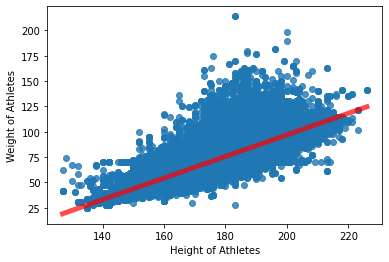

In [125]:
# Plot
ax = sns.regplot(x = olympic_athlets_df.Height, y = olympic_athlets_df.Weight, line_kws={'color':'r', 'alpha':0.7, 'lw':5})
ax.set_xlabel('Height of Athletes')
ax.set_ylabel('Weight of Athletes')
plt.show()

**Correlation** measures how closely are related two variables or sets of variables. For our example, we want to measure the relationship between **Height** and **Weight** of athletes in the Olympic games. The indicator is 0.78, thus indicating a positive medium / high correlation (the higher the height, the greater the weight and vice versa, the lower the height, the lower the weight). 

## **EXERCISE 3**

**STATEMENT:** Continuing with the sports theme data, calculates the correlation of all the attributes with each other and represents them in a matrix with different colors of intensity.

In [126]:
# Correlation of Numerical Variables

correlations_all_variables = olympic_athlets_df.corr()
correlations_all_variables

,Age,Height,Weight,Year
Age,1.000000,0.106944,0.161847,-0.108380
Height,0.106944,1.000000,0.786609,0.029915
Weight,0.161847,0.786609,1.000000,0.011457
Year,-0.108380,0.029915,0.011457,1.000000


In [127]:
# We can only do the heatmap of the numeric variables

olympic_athlets_df.corr().style.background_gradient(cmap="YlOrBr")

,Age,Height,Weight,Year
Age,1.000000,0.106944,0.161847,-0.108380
Height,0.106944,1.000000,0.786609,0.029915
Weight,0.161847,0.786609,1.000000,0.011457
Year,-0.108380,0.029915,0.011457,1.000000


In [128]:
# Correlation Graph

import plotly.express as px

fig = px.imshow(correlations_all_variables,
                labels=dict(x="Numerical Variables of Olympic athletes", y="Numerical Variables of Olympic athletes", color="Correlation"), 
                x=['Age', 'Height', 'Weight', 'Year'],
                y=['Age', 'Height', 'Weight', 'Year'])
fig.update_xaxes(side="top")
fig.show()

In this heat map we can see the correlations for the numerical variables. We can see the correlations with **lower intensity** in lilac / maroon and those in yellow / orange the correlations for **greater intensity**.

## **EXERCISE 4**

**STATEMENT:** Continuing with the sports topic data, select an attribute and calculate the geometric mean and harmonic mean.

**LINK INFORMATION:** https://stackoverflow.com/questions/43099542/python-easy-way-to-do-geometric-mean-in-python

In [129]:
from scipy import stats

In [130]:
# GEOMETRIC MEAN AGE 
print('Geometric Mean of Age: {}'.format(round(stats.gmean(olympic_athlets_df.Age),2)))

Geometric Mean of Age: 24.89


The **geometric mean** is calculated by multiplying all the values of a series with each other and taking the square root, thereby avoiding the outlier bias. For our example of the age variable, we can see how the mean goes from 25.56 to 24.89.

In [131]:
# HARMONIC MEAN AGE 
print('Harmonic Mean of Age: {}'.format(round(stats.hmean(olympic_athlets_df.Age),2)))

Harmonic Mean of Age: 24.3


The **harmonic mean** is equal to the number of observations in a series divided by the sum of the inverses of each of these observations. For our Age variable we see that the mean goes from 25.56 to 24.3.